In [34]:
import mne
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [35]:
mat = scipy.io.loadmat("/Users/juhyun/Desktop/trainingData/Mouse01/Mouse01/Day1_light_cycle/EEG.mat")

In [36]:
print(mat.keys())
print(type(mat['EEG']))

# mat['EEG']의 구조 확인
print(mat['EEG'])

dict_keys(['__header__', '__version__', '__globals__', 'EEG'])
<class 'numpy.ndarray'>
[[ 27]
 [ 32]
 [ 46]
 ...
 [179]
 [119]
 [ 52]]


In [37]:
print(mat['EEG'][0].shape) #배열의 크기 확인 위해 
print(mat['EEG'][0].dtype) #배열에 저장된 데이타 타입 확인 위해
print(type(mat['EEG'][0])) #numPy 타입인지 확인하기 위해 
print(mat['EEG'].shape) #배열의 전체 크기

(1,)
int16
<class 'numpy.ndarray'>
(22118400, 1)


In [38]:
srate=512
#raw를 생성하기 위해서는 info가 필요한데, info만들기 위해서는 매개변수 필요
eeg_ch_names = [
    "EEG"
]
emg_ch_names = ["EMG"]
ch_names = eeg_ch_names + emg_ch_names + ["Stim"]
ch_types = ["eeg"] * 64 + ["emg"] * 4 + ["stim"]

In [39]:
# 데이터 정규화
eeg_data = mat['EEG'].flatten()  # 1차원 배열로 변환
eeg_data = eeg_data.astype(float)  # float 타입으로 변환
eeg_data /= np.iinfo(np.int16).max  # -1.0과 1.0 사이로 정규화


# MNE를 사용하여 Raw 객체 생성
ch_names = ['EEG']  # 채널 이름
ch_types = ['eeg']  # 채널 타입
info = mne.create_info(ch_names=ch_names, sfreq=512, ch_types=ch_types)  # 샘플 레이트는 512Hz
raw = mne.io.RawArray(eeg_data[None, :], info)

Creating RawArray with float64 data, n_channels=1, n_times=22118400
    Range : 0 ... 22118399 =      0.000 ... 43199.998 secs
Ready.


In [40]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 1
 projs: []
 sfreq: 512.0 Hz
>


In [41]:
#  2.5초 별로 에폭 생성
events = mne.make_fixed_length_events(raw, duration=2.5)
epochs = mne.Epochs(raw, events, tmin=0, tmax=2.5, baseline=None, preload=True)

Not setting metadata
17280 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 17280 events and 1281 original time points ...
1 bad epochs dropped


In [42]:
# 델타 대역 필터링
epochs.filter(0.5, 4.0)

Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 3381 samples (6.604 s)



/var/folders/g5/xx3rg60d1hg5vf4tb1npq5g80000gn/T/ipykernel_22326/3419727207.py:2: RuntimeWarning: filter_length (3381) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(0.5, 4.0)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.4s
[Parallel(n_jo

Number of events,17279
Events,1: 17279
Time range,0.000 – 2.500 s
Baseline,off


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 3381 samples (6.604 s)

Using matplotlib as 2D backend.


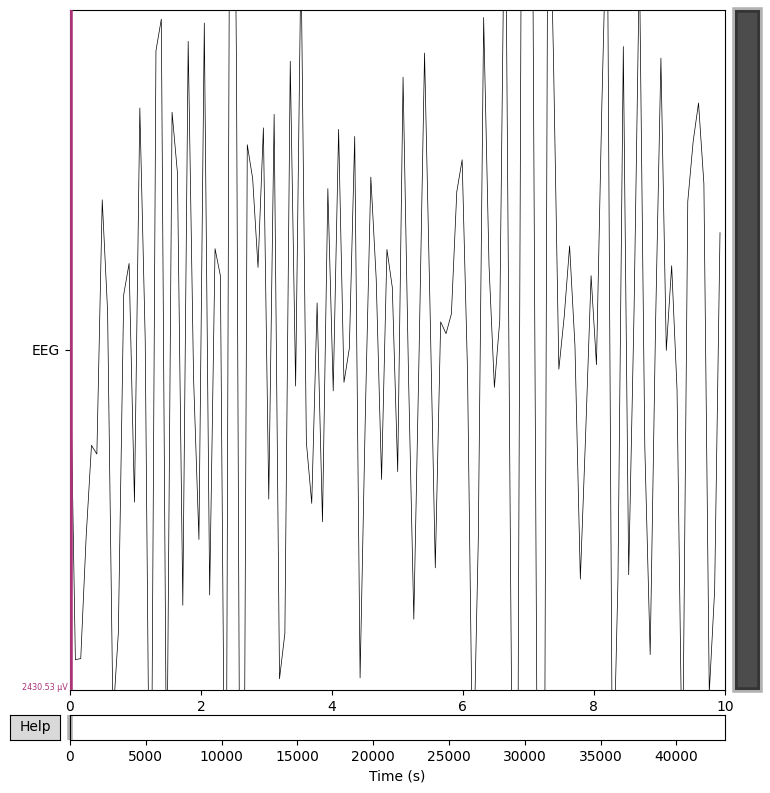

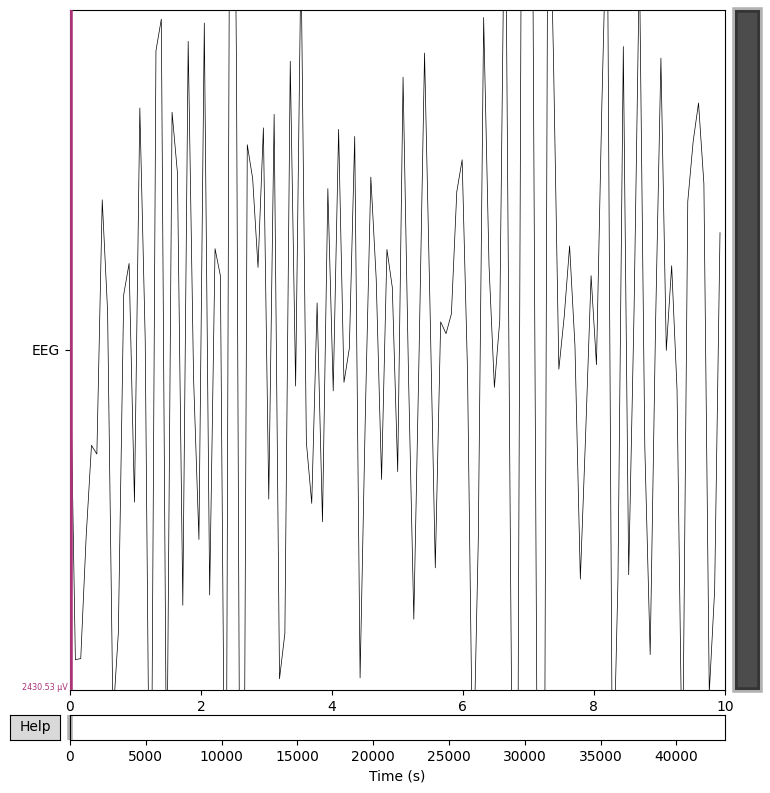

In [45]:
# 필터 적용 
raw_filtered = raw.copy().filter(0.5,4.0)

# 필터링된 데이터 시각화
raw_filtered.plot(scalings='auto', title='Filtered EEG Data')

In [47]:
print("Raw의 길이:", len(raw))
print("초로 환산하면:", len(raw) / srate)

Raw의 길이: 22118400
초로 환산하면: 43200.0


In [48]:
events = mne.make_fixed_length_events(raw, duration=2.5)

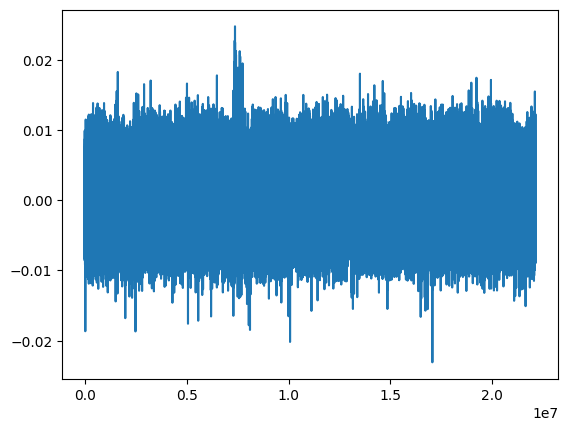

In [49]:
raw_data = raw.get_data()
plt.plot(raw_data[0])
plt.show()

In [50]:
epochs= mne.Epochs(raw, events, tmin=0, tmax=2.5, baseline=None, preload=True)

Not setting metadata
17280 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 17280 events and 1281 original time points ...
1 bad epochs dropped
